# COMPUTING MOLECULAR DESCRIPTORS

In [15]:
import pandas as pd
import numpy as np
df= pd.read_csv('dataset.csv')
df

,Unnamed: 0,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,991,3423840.0,CNC1=C(N=CC=C1)C=NNC(=S)N,30.0,0
1,2104,3157186.0,CCCC1=C(C2=NC3=CC=CC=C3N2C(=C1)NCCOCCO)C#N,0.0,0
2,838,15945344.0,CCN(CC)C1=CC(=[N+]2CCCC2)CC(C1)(C)C.[I-],45.0,1
3,630,6603246.0,CCCCN1C2=C(CCC2)C(=N)C3=C1CCC3.I,61.0,1
4,1579,2963165.0,CC1=CC=C(C=C1)N2CC(CC2=O)C(=O)NC3=NC4=C(S3)C=C...,0.0,0
...,...,...,...,...,...
2099,946,16746116.0,CC[C@H](CO)NC1=NC(=C2C(=N1)N(C=N2)C(C)C)NC3=CC...,36.0,1
2100,632,1150803.0,CC(C)(C)C1=CC=C(C=C1)C(=O)NC2=CC=C(C=C2)C(=O)N...,61.0,1
2101,2137,984185.0,C1COC2=C(O1)C=CC(=C2)C(=O)CSC3=NC4=C(C=NN4)C(=...,0.0,0
2102,1743,3220816.0,CN(C)C1=CC=C(C=C1)NC(=O)CN2CCC(CC2)NC(=O)C3CCCCC3,0.0,0


In [17]:
from rdkit import Chem
from rdkit.Chem import AllChem
from mordred import Calculator, descriptors
from rdkit.Chem import MACCSkeys
from rdkit.Chem import PandasTools, Descriptors, Lipinski
from rdkit import DataStructs

In [19]:
smiles_list = df['Canonical_smiles'].to_list()  # convert the Canonical Smiles columns to a list
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list] # generates the 2D structures of molecular smiles

In [20]:
#function to calculate Morgan fps
def morgan_fps(data):
  fps = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048) for mol in data]  # Calculate Morgan fingerprints for each molecule
  fp_array = [np.array(fp) for fp in fps]   # Convert fingerprints to numpy array
  column_names = ["morgan_" + str(i) for i in range(len(fp_array[0]))]
  return pd.DataFrame(fp_array, columns = column_names)


# DATA PROCESSING AND SPLITTING

In [21]:
d1 = morgan_fps(mols)
X = pd.concat([d1], axis = 1)
X

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2102,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y = df["Activity_outcome"]
y

0       0
1       0
2       1
3       1
4       0
       ..
2099    1
2100    1
2101    0
2102    0
2103    0
Name: Activity_outcome, Length: 2104, dtype: int64

In [23]:
from sklearn.feature_selection import VarianceThreshold

# Define variance threshold
# Here, we use a threshold of 0 which would remove all features with zero variance
sel = VarianceThreshold(threshold=0)

# Fit and transform the data
sel.fit(X)

mask = sel.get_support()
X = X[X.columns[mask]]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

# APPLICABILITY DOMAIN

In [25]:
import numpy as np
from sklearn import datasets
from scipy.spatial import distance

In [26]:
def in_applicability_domain(X, X_train, threshold):
    # Calculate the distance from each point in X to its nearest neighbor in X_train
    dist = distance.cdist(X, X_train, 'euclidean')
    min_dist = np.min(dist, axis=1)
    
    # A point is in the applicability domain if its distance to the nearest neighbor is less than the threshold
    return min_dist < threshold

In [27]:
# Calculate the applicability domain with a threshold of 6.0
app_domain = in_applicability_domain(X_test, X_train, threshold=6.0)

print('Applicability domain:', app_domain)

Applicability domain: [ True False  True  True  True False  True False False  True False  True
 False False  True False  True  True False  True False  True  True  True
  True  True False False  True  True  True  True False  True False False
 False False  True False  True False  True  True  True False False  True
  True  True False False  True  True False  True False  True  True  True
  True  True  True  True  True  True False False  True  True  True  True
 False  True False  True  True False  True False False  True  True  True
 False  True  True  True  True  True  True False False  True  True  True
 False  True  True False  True  True  True False  True False  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True False  True  True False  True  True  True  True
  True  True  True False False  True  True False  True False  True False
  True False  True  True False  True  True  True False  True False False
  True False  True False Fals

In [28]:
# Assuming you have your applicability domain computed as app_domain

# Find inliers which are inside the applicability domain
inliers = app_domain

# Apply the mask to the test dataset
X_test_inliers = X_test[inliers]
X_test_inliers

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
y_test_inliers = y_test[inliers]
y_test = y_test_inliers

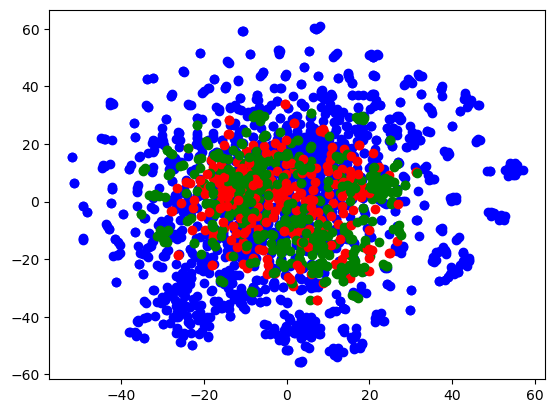

In [30]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create a t-SNE object
tsne = TSNE(n_components=2)

# Fit and transform X_train to 2D
X_train_2D = tsne.fit_transform(X_train)

# Transform X_test to 2D using the same t-SNE transformation
X_test_2D = tsne.fit_transform(X_test)

# Calculate applicability domain
app_domain = in_applicability_domain(X_test, X_train, threshold=6.0)

# Plot the training data in blue
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], color='blue')

# Plot the test data in red or green depending on whether they are in or out of the applicability domain
for i in range(len(X_test_2D)):
    if app_domain[i]:
        plt.scatter(X_test_2D[i, 0], X_test_2D[i, 1], color='green')
    else:
        plt.scatter(X_test_2D[i, 0], X_test_2D[i, 1], color='red')

plt.show()


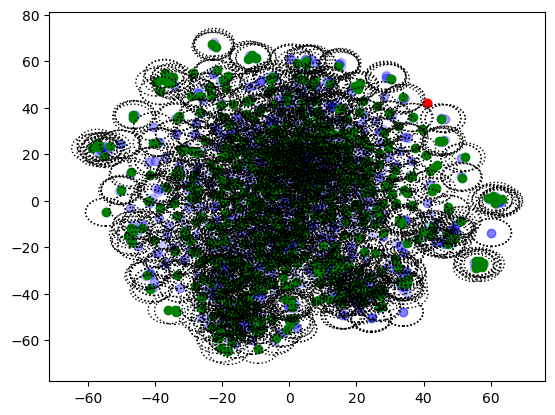

In [32]:
# Create a t-SNE object
tsne = TSNE(n_components=2)

# Combine training and test data
combined_data = np.vstack([X_train, X_test])

# Apply t-SNE to the combined data
combined_data_2D = tsne.fit_transform(combined_data)

# Split the transformed data back into training and test sets
X_train_2D, X_test_2D = combined_data_2D[:len(X_train)], combined_data_2D[len(X_train):]

# Calculate applicability domain with a threshold of 6.0
app_domain = in_applicability_domain(X_test_2D, X_train_2D, threshold=6.0)

# Plot the training data in blue
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], color='blue', alpha=0.2)

# Plot the test data in red or green based on the applicability domain
for i in range(len(X_test_2D)):
    if app_domain[i]:
        plt.scatter(X_test_2D[i, 0], X_test_2D[i, 1], color='green')
    else:
        plt.scatter(X_test_2D[i, 0], X_test_2D[i, 1], color='red')

# Draw threshold circles around each training data point
for point in X_train_2D:
    circle = plt.Circle((point[0], point[1]), 6.0, color='black', fill=False, linestyle='dotted')
    plt.gca().add_patch(circle)

plt.show()

# BUILDING KNN MODEL

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

# Fit the model
knn.fit(X_train, y_train)

# Predict the test set results
preds = knn.predict(X_test_inliers)
proba = knn.predict_proba(X_test_inliers)

In [34]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tn + tp) / (tn+tp+fn+fp)
balanced_accuracy = (sensitivity + specificity) / 2
mcc = matthews_corrcoef(y_test, preds)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
roc_auc = roc_auc_score(y_test, proba[:, 1]) # calculate ROC AUC

print(f"sensitivity: {sensitivity}, specificity: {specificity}, precision: {precision}, f1: {f1} \nmcc: {mcc}, accuracy: {accuracy}, roc_auc: {roc_auc} \nbalanced_accuracy: {balanced_accuracy}")


sensitivity: 0.863905325443787, specificity: 0.9020408163265307, precision: 0.8588235294117647, f1: 0.8613569321533923 
mcc: 0.7652533747603207, accuracy: 0.8864734299516909, roc_auc: 0.8829730708851589 
balanced_accuracy: 0.8829730708851589


# TUNING HYPERPARAMETERS

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter values that should be searched
k_range = list(range(1, 31))

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the grid with data
grid.fit(X_train, y_train)

# View the complete results
print(grid.cv_results_)

# Examine the best model
print("\nBest score:", grid.best_score_)
print("Best parameters:", grid.best_params_)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

{'mean_fit_time': array([0.03388126, 0.03478069, 0.03597889, 0.03757808, 0.03707829,
       0.03587968, 0.03238144, 0.03298099, 0.03258171, 0.03438022,
       0.03418047, 0.03467963, 0.03208201, 0.03308122, 0.03457968,
       0.04127648, 0.03537924, 0.03697872, 0.03398073, 0.03128221,
       0.03198142, 0.03477991, 0.03667796, 0.03418028, 0.03427994,
       0.03547978, 0.03507988, 0.03637946, 0.04187603, 0.04107664]), 'std_fit_time': array([0.00353203, 0.0033692 , 0.00528859, 0.00515827, 0.00567918,
       0.0050654 , 0.0022436 , 0.00397247, 0.00219899, 0.00402729,
       0.00466241, 0.00442595, 0.00262356, 0.00238379, 0.00531086,
       0.02212795, 0.00685349, 0.00499722, 0.00444627, 0.00219209,
       0.00316009, 0.00345669, 0.01266629, 0.00416408, 0.00334625,
       0.00433882, 0.00486485, 0.00438465, 0.0141233 , 0.00805095]), 'mean_score_time': array([0.07225916, 0.0793545 , 0.0776556 , 0.08545136, 0.08435178,
       0.07735534, 0.07105925, 0.0711587 , 0.06826065, 0.07475691,
     

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

In [18]:
# Instantiate the model with the best parameters
best_knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])

# Fit the model with the training data
best_knn.fit(X_train, y_train)

# Predict the test set results
best_preds = best_knn.predict(X_test_inliers)
best_proba = best_knn.predict_proba(X_test_inliers)

# Now you can use `best_preds` and `best_proba` for further evaluation of the model


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [19]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tn + tp) / (tn+tp+fn+fp)
balanced_accuracy = (sensitivity + specificity) / 2
mcc = matthews_corrcoef(y_test, preds)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
roc_auc = roc_auc_score(y_test, proba[:, 1]) # calculate ROC AUC

print(f"sensitivity: {sensitivity}, specificity: {specificity}, precision: {precision}, f1: {f1} \nmcc: {mcc}, accuracy: {accuracy}, roc_auc: {roc_auc} \nbalanced_accuracy: {balanced_accuracy}")


sensitivity: 0.863905325443787, specificity: 0.9020408163265307, precision: 0.8588235294117647, f1: 0.8613569321533923 
mcc: 0.7652533747603207, accuracy: 0.8864734299516909, roc_auc: 0.8829730708851589 
balanced_accuracy: 0.8829730708851589


# MODEL VALIDATION

In [20]:
import pandas as pd
import numpy as np
dp= pd.read_csv('validation_dataset.csv')
dp

,Unnamed: 0,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,486,46903215.0,CC1=CC=C(C=C1)S(=O)(=O)N(CC#C)C[C@@H]2[C@H]([C...,71.0,1
1,1700,24980419.0,C1CC1N(CC2=NN=C(O2)C3=CC=C(C=C3)Cl)C(=O)C4=CC(...,0.0,0
2,1309,7567657.0,CC1CCC2(CC1)C(=O)N(C(=O)N2)CC(=O)N3CCC4=CC(=C(...,7.0,0
3,1516,2560914.0,CC1=C(C=CC(=C1)Cl)NC(=O)CN2C(=O)C(=O)N(C2=O)C3...,1.0,0
4,1090,352429.0,CC(=O)ON=C1C=CC(=C(C#N)C2=CC=CC=C2)C=C1,20.0,0
...,...,...,...,...,...
229,1911,9636483.0,C1=CC=C2C(=C1)C(=NC(=N2)C3=CC=CC=C3Cl)N/N=C/C4...,0.0,0
230,309,16681822.0,CCCCCC1=CC(=C(C=C1)OCCC[N+]2=CC=CC=C2)CCCCC.[Cl-],82.0,1
231,2253,7524261.0,CCS(=O)(=O)NC1=CC=CC(=C1)C2=NN3C(=NN=C3C4=CN=C...,0.0,0
232,2243,2867068.0,CC1=CC2=C(C3=C(CCCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,0.0,0


In [21]:
valdata = dp.copy()
colname = ["Canonical_smiles", "Activity_outcome"]
valdata = valdata[colname]

valdata.drop_duplicates(inplace = True, ignore_index = True)
valdata.reset_index(inplace = True, drop = True)
valdata

,Canonical_smiles,Activity_outcome
0,CC1=CC=C(C=C1)S(=O)(=O)N(CC#C)C[C@@H]2[C@H]([C...,1
1,C1CC1N(CC2=NN=C(O2)C3=CC=C(C=C3)Cl)C(=O)C4=CC(...,0
2,CC1CCC2(CC1)C(=O)N(C(=O)N2)CC(=O)N3CCC4=CC(=C(...,0
3,CC1=C(C=CC(=C1)Cl)NC(=O)CN2C(=O)C(=O)N(C2=O)C3...,0
4,CC(=O)ON=C1C=CC(=C(C#N)C2=CC=CC=C2)C=C1,0
...,...,...
229,C1=CC=C2C(=C1)C(=NC(=N2)C3=CC=CC=C3Cl)N/N=C/C4...,0
230,CCCCCC1=CC(=C(C=C1)OCCC[N+]2=CC=CC=C2)CCCCC.[Cl-],1
231,CCS(=O)(=O)NC1=CC=CC(=C1)C2=NN3C(=NN=C3C4=CN=C...,0
232,CC1=CC2=C(C3=C(CCCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,0


In [22]:
smi_list = valdata["Canonical_smiles"].to_list()
molsv = [Chem.MolFromSmiles(smi) for smi in smi_list]

X_val = morgan_fps(molsv)
X_val = X_val[X_val.columns[mask]]
X_val

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y_val = valdata["Activity_outcome"]
y_val

0      1
1      0
2      0
3      0
4      0
      ..
229    0
230    1
231    0
232    0
233    1
Name: Activity_outcome, Length: 234, dtype: int64

In [25]:
y_valpred = knn.predict(X_val)
#y_valproba = svm.predict_proba(X_val)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_val, y_valpred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tn + tp) / (tn+tp+fn+fp)
balanced_accuracy = (sensitivity + specificity) / 2
#mcc = matthews_corrcoef(y_val, y_valproba)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
#roc_auc = roc_auc_score(y_val, y_valproba[:, 1]) # calculate ROC AUC

print(f"sensitivity: {sensitivity}, specificity: {specificity}, precision: {precision}, f1: {f1} \nmcc: {mcc}, accuracy: {accuracy}, roc_auc: {roc_auc} \nbalanced_accuracy: {balanced_accuracy}")


sensitivity: 0.8137254901960784, specificity: 0.8257575757575758, precision: 0.7830188679245284, f1: 0.7980769230769231 
mcc: 0.7652533747603207, accuracy: 0.8205128205128205, roc_auc: 0.8829730708851589 
balanced_accuracy: 0.8197415329768272
